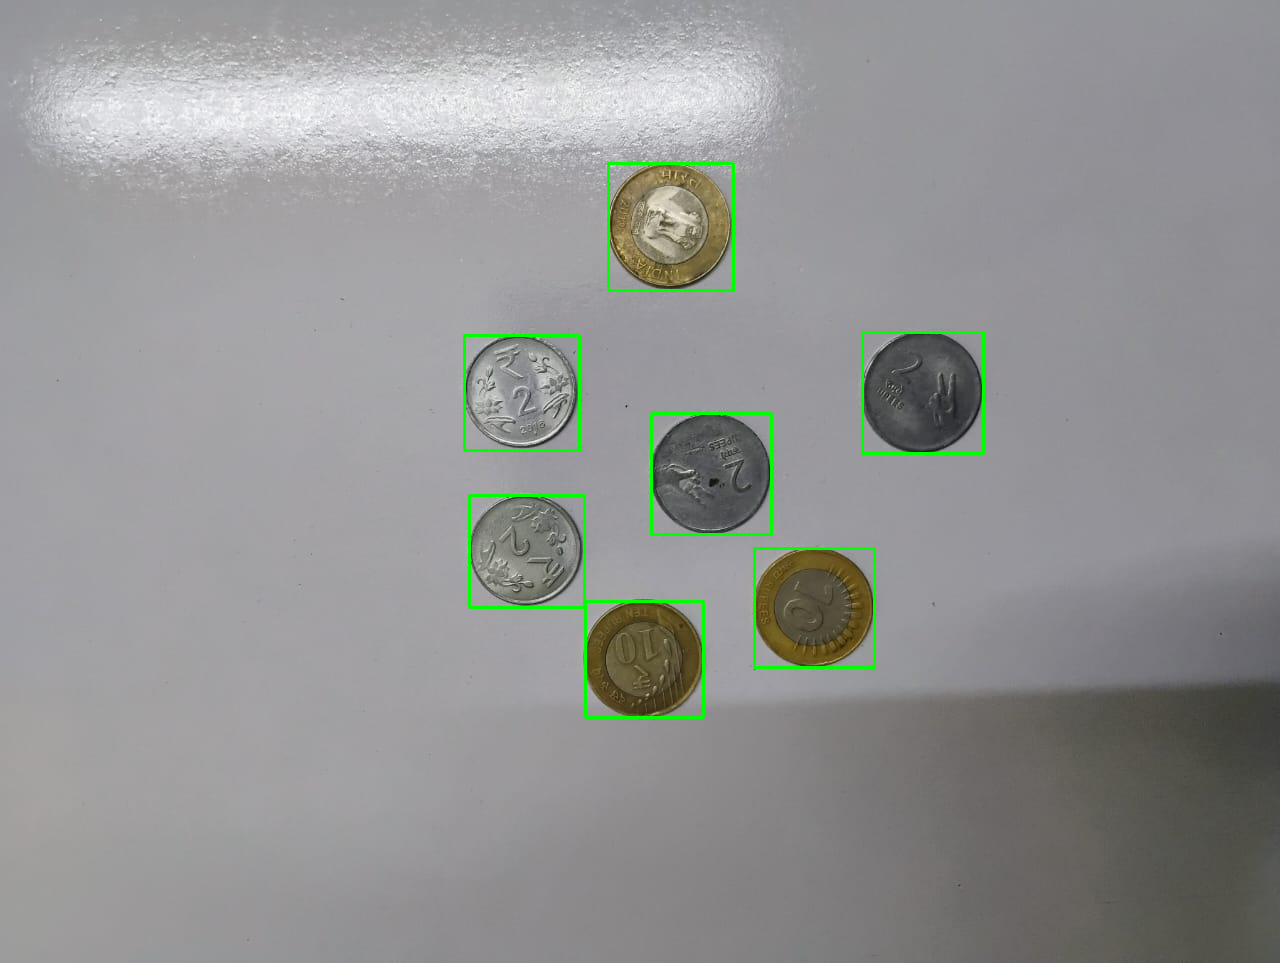

Total Coins Detected: 7


In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Required for Colab

def detect_and_segment_coins(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to smooth the image
    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    # Apply Adaptive Thresholding for better edge detection
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Apply morphological operations to remove small noise
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    coin_count = 0
    min_coin_area = 1000  # Minimum area to consider as a coin

    for contour in contours:
        area = cv2.contourArea(contour)

        if area > min_coin_area:  # Ignore small objects (e.g., designs inside coins)
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            coin_count += 1

    # Save and display the result
    cv2.imwrite("detected_coins.jpg", image)
    cv2_imshow(image)

    print(f"Total Coins Detected: {coin_count}")

if __name__ == "__main__":
    image_path = "/content/coins.jpeg"  # Replace with your actual image path
    detect_and_segment_coins(image_path)
